## Import related module

In [75]:
import csv
import math
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from operator import itemgetter
%matplotlib inline

## Read file

In [76]:
index=pd.read_csv('Filmandactor.csv')
index.head()

Actor                         Film  Year   Genre  Gender  \
0      Amai Kamarudin  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
1        Josiah Hogan  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
2  Shaharuddin Thamby  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
3   Sharifah Shahirah  7 Hari Kisah Cinta Langkawi  2019  Comedy  Female   
4           Chi Azim   7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   

   Races  Debut year  
0  Malay        2008  
1  Malay        2013  
2  Malay        1989  
3  Malay        1993  
4  Malay        2019

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


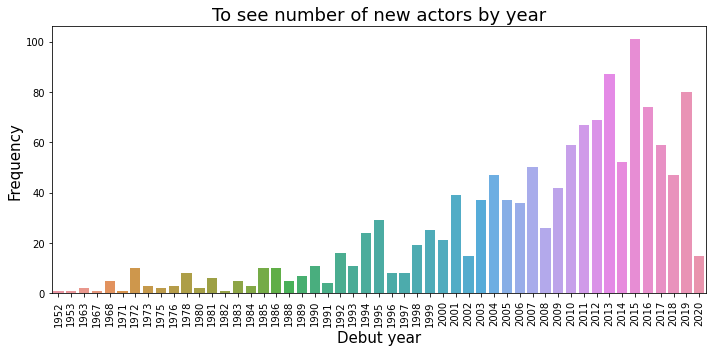

In [77]:
# make barplot
#order=index.sort_values('Debut year')
#index['Debut year'].value_counts().plot(kind='bar',figsize=(10,8))
plt.figure(figsize=(10, 5))
sns.countplot(index['Debut year'])
# set labels
plt.xticks(rotation=90)
plt.xlabel("Debut year", size=15)
plt.ylabel("Frequency", size=15)
plt.title("To see number of new actors by year", size=18)
plt.tight_layout()

## Calculate total films for each actors

In [78]:
new_index = index.Actor.value_counts().rename_axis('Actor').to_frame('Total film')
index = pd.merge(index,new_index,on ='Actor',how ='outer') #merge output column into original data frame
index

Actor                         Film  Year   Genre  Gender  \
0     Amai Kamarudin  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
1     Amai Kamarudin                Temuan Takdir  2016   Crime    Male   
2       Josiah Hogan  7 Hari Kisah Cinta Langkawi  2019  Comedy    Male   
3       Josiah Hogan             KL Special Force  2018  Action    Male   
4       Josiah Hogan                  KL Vampires  2019  Action    Male   
...              ...                          ...   ...     ...     ...   
1296       Dain Said                         Wira  2019  Action    Male   
1297       Fify Azmi                         Wira  2019  Action  Female   
1298     Hilal Azman                         Wira  2019  Action    Male   
1299    Yayan Ruhian                         Wira  2019  Action    Male   
1300  Serina Redzuan                  Zack Kapcai  2016  Comedy  Female   

       Races  Debut year  Total film  
0      Malay        2008           2  
1      Malay        2008           2  
2      Malay        2013           6  
3      Malay        2013           6  
4      Malay        2013           6  
...      ...         ...         ...  
1296   Malay        2011           1  
1297   Malay        2019           1  
1298   Malay        1983           1  
1299  Others        2009           1  
1300   Malay        2002           1  

[1301 rows x 8 columns]

## Race and gender of actors

<AxesSubplot:title={'center':'Actors of Malay Films'}, xlabel='Race and Gender', ylabel='Frequency'>

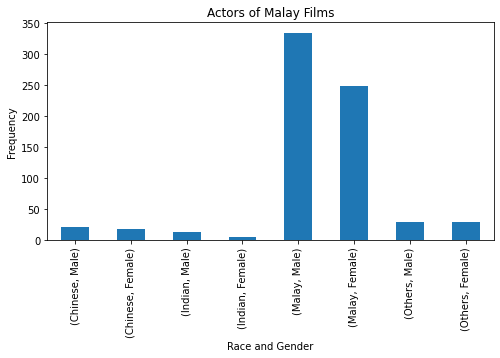

In [79]:
# sorting by first name
race=index.copy()
race.sort_values("Actor", inplace = True)
# dropping ALL duplicate actor's name
race.drop_duplicates(subset ="Actor",keep = "first", inplace = True)
freq=race.groupby(['Races'])['Gender'].value_counts()
freq.plot(kind='bar', title='Actors of Malay Films', ylabel='Frequency',
         xlabel='Race and Gender', figsize=(8, 4))

## Exclude actors with one film

In [80]:
# remove rows by filtering
index.drop(index.loc[index['Total film']==1].index, inplace=True)
# display the dataframe
index.to_csv('Filmandactor_1.csv', index=False) #save to new file
index

Actor                                Film  Year      Genre  \
0     Amai Kamarudin         7 Hari Kisah Cinta Langkawi  2019     Comedy   
1     Amai Kamarudin                       Temuan Takdir  2016      Crime   
2       Josiah Hogan         7 Hari Kisah Cinta Langkawi  2019     Comedy   
3       Josiah Hogan                    KL Special Force  2018     Action   
4       Josiah Hogan                         KL Vampires  2019     Action   
...              ...                                 ...   ...        ...   
1231     Razak Ahmad                            XX Ray 3  2019     Sci-fi   
1271   Asyiela Putri         Upin & Ipin: Jeng Jeng Jeng  2016  Animation   
1272   Asyiela Putri  Upin & Ipin: Keris Siamang Tunggal  2019  Animation   
1289       Fad Bocey                  Warna Cinta Impian  2016   Romantic   
1290       Fad Bocey                         Zack Kapcai  2016     Comedy   

      Gender  Races  Debut year  Total film  
0       Male  Malay        2008           2  
1       Male  Malay        2008           2  
2       Male  Malay        2013           6  
3       Male  Malay        2013           6  
4       Male  Malay        2013           6  
...      ...    ...         ...         ...  
1231    Male  Malay        2002           2  
1271  Female  Malay        2016           2  
1272  Female  Malay        2016           2  
1289    Male  Malay        2013           2  
1290    Male  Malay        2013           2  

[849 rows x 8 columns]

## Calculate career year the actor has been in the industry

In [81]:
def year(row):
    return 2020 - row['Debut year']

index['Career year'] = index.apply(year, axis=1)
index.head()

Actor                         Film  Year   Genre Gender  Races  \
0  Amai Kamarudin  7 Hari Kisah Cinta Langkawi  2019  Comedy   Male  Malay   
1  Amai Kamarudin                Temuan Takdir  2016   Crime   Male  Malay   
2    Josiah Hogan  7 Hari Kisah Cinta Langkawi  2019  Comedy   Male  Malay   
3    Josiah Hogan             KL Special Force  2018  Action   Male  Malay   
4    Josiah Hogan                  KL Vampires  2019  Action   Male  Malay   

   Debut year  Total film  Career year  
0        2008           2           12  
1        2008           2           12  
2        2013           6            7  
3        2013           6            7  
4        2013           6            7

## Define HHI*

In [82]:
#Nan were replaced with 1, because denominator 0=(1-(1/1)) for actors that work in one film only
def hhi(series):
    _, cnt = np.unique(series, return_counts=True)
    a = 1-(((np.square(cnt/cnt.sum()).sum())-(1/cnt.sum()))/(1-(1/cnt.sum())))
    if math.isnan(a):
        return 0
    else:
        return a

## Find HHI* for each year (cumulative films)

### HHI* 2020

In [83]:
new_index = index.groupby('Actor').agg({'Genre': hhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_index, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2020'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

Actor                          Film  Year     Genre  Gender  Races  \
90      A. Galak                       Munafik  2016    Horror    Male  Malay   
89      A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
88      A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
730   Aaron Aziz     Suamiku, Encik Perfect 10  2015    Comedy    Male  Malay   
729   Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
624  Zul Ariffin            Hantu Kak Limah 3   2018    Comedy    Male  Malay   
625  Zul Ariffin                    J Revolusi  2017    Action    Male  Malay   
626  Zul Ariffin               Misteri Dilaila  2019  Thriller    Male  Malay   
380   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   
381   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   

     Debut year  Total film  Career year  HHI*_2020  
90         1981           3           39   0.666667  
89         1981           3           39   0.666667  
88         1981           3           39   0.666667  
730        2008           4           12   0.833333  
729        2008           4           12   0.833333  
..          ...         ...          ...        ...  
624        2010           5           10   0.700000  
625        2010           5           10   0.700000  
626        2010           5           10   0.700000  
380        2014           2            6   0.000000  
381        2014           2            6   0.000000  

[849 rows x 10 columns]

### HHI* 2019

In [84]:
h19 = index[index['Year']<=2019]
new_h19 = h19.groupby('Actor').agg({'Genre': hhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_h19, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2019'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak                       Munafik  2016    Horror    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
3     Aaron Aziz     Suamiku, Encik Perfect 10  2015    Comedy    Male  Malay   
4     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin      Tombiruo: Penunggu Rimba  2017    Action    Male  Malay   
843  Zul Ariffin                       Sangkar  2019    Action    Male  Malay   
846  Zul Ariffin               Misteri Dilaila  2019  Thriller    Male  Malay   
847   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   
848   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   

     Debut year  Total film  Career year  HHI*_2020  HHI*_2019  
0          1981           3           39   0.666667   0.666667  
1          1981           3           39   0.666667   0.666667  
2          1981           3           39   0.666667   0.666667  
3          2008           4           12   0.833333   0.833333  
4          2008           4           12   0.833333   0.833333  
..          ...         ...          ...        ...        ...  
842        2010           5           10   0.700000   0.700000  
843        2010           5           10   0.700000   0.700000  
846        2010           5           10   0.700000   0.700000  
847        2014           2            6   0.000000   0.000000  
848        2014           2            6   0.000000   0.000000  

[849 rows x 11 columns]

### HHI* 2018

In [85]:
h18 = index[index['Year']<=2018]
new_h18 = h18.groupby('Actor').agg({'Genre': hhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_h18, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2018'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak                       Munafik  2016    Horror    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
3     Aaron Aziz     Suamiku, Encik Perfect 10  2015    Comedy    Male  Malay   
4     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin            Hantu Kak Limah 3   2018    Comedy    Male  Malay   
843  Zul Ariffin                    J Revolusi  2017    Action    Male  Malay   
846  Zul Ariffin               Misteri Dilaila  2019  Thriller    Male  Malay   
847   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   
848   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   

     Debut year  Total film  Career year  HHI*_2020  HHI*_2019  HHI*_2018  
0          1981           3           39   0.666667   0.666667   0.666667  
1          1981           3           39   0.666667   0.666667   0.666667  
2          1981           3           39   0.666667   0.666667   0.666667  
3          2008           4           12   0.833333   0.833333   0.833333  
4          2008           4           12   0.833333   0.833333   0.833333  
..          ...         ...          ...        ...        ...        ...  
842        2010           5           10   0.700000   0.700000   0.666667  
843        2010           5           10   0.700000   0.700000   0.666667  
846        2010           5           10   0.700000   0.700000   0.666667  
847        2014           2            6   0.000000   0.000000   0.000000  
848        2014           2            6   0.000000   0.000000   0.000000  

[849 rows x 12 columns]

### HHI* 2017

In [86]:
h17 = index[index['Year']<=2017]
new_h17 = h17.groupby('Actor').agg({'Genre': hhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_h17, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2017'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak                       Munafik  2016    Horror    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
3     Aaron Aziz     Suamiku, Encik Perfect 10  2015    Comedy    Male  Malay   
4     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin      Tombiruo: Penunggu Rimba  2017    Action    Male  Malay   
843  Zul Ariffin                       Sangkar  2019    Action    Male  Malay   
846  Zul Ariffin               Misteri Dilaila  2019  Thriller    Male  Malay   
847   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   
848   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   

     Debut year  Total film  Career year  HHI*_2020  HHI*_2019  HHI*_2018  \
0          1981           3           39   0.666667   0.666667   0.666667   
1          1981           3           39   0.666667   0.666667   0.666667   
2          1981           3           39   0.666667   0.666667   0.666667   
3          2008           4           12   0.833333   0.833333   0.833333   
4          2008           4           12   0.833333   0.833333   0.833333   
..          ...         ...          ...        ...        ...        ...   
842        2010           5           10   0.700000   0.700000   0.666667   
843        2010           5           10   0.700000   0.700000   0.666667   
846        2010           5           10   0.700000   0.700000   0.666667   
847        2014           2            6   0.000000   0.000000   0.000000   
848        2014           2            6   0.000000   0.000000   0.000000   

     HHI*_2017  
0     0.666667  
1     0.666667  
2     0.666667  
3     0.666667  
4     0.666667  
..         ...  
842   0.000000  
843   0.000000  
846   0.000000  
847   0.000000  
848   0.000000  

[849 rows x 13 columns]

### HHI* 2016

In [87]:
h16 = index[index['Year']<=2016]
new_h16 = h16.groupby('Actor').agg({'Genre': hhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_h16, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2016'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak                       Munafik  2016    Horror    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
3     Aaron Aziz     Suamiku, Encik Perfect 10  2015    Comedy    Male  Malay   
4     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin            Hantu Kak Limah 3   2018    Comedy    Male  Malay   
843  Zul Ariffin                    J Revolusi  2017    Action    Male  Malay   
846  Zul Ariffin               Misteri Dilaila  2019  Thriller    Male  Malay   
847   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   
848   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   

     Debut year  Total film  Career year  HHI*_2020  HHI*_2019  HHI*_2018  \
0          1981           3           39   0.666667   0.666667   0.666667   
1          1981           3           39   0.666667   0.666667   0.666667   
2          1981           3           39   0.666667   0.666667   0.666667   
3          2008           4           12   0.833333   0.833333   0.833333   
4          2008           4           12   0.833333   0.833333   0.833333   
..          ...         ...          ...        ...        ...        ...   
842        2010           5           10   0.700000   0.700000   0.666667   
843        2010           5           10   0.700000   0.700000   0.666667   
846        2010           5           10   0.700000   0.700000   0.666667   
847        2014           2            6   0.000000   0.000000   0.000000   
848        2014           2            6   0.000000   0.000000   0.000000   

     HHI*_2017  HHI*_2016  
0     0.666667        1.0  
1     0.666667        1.0  
2     0.666667        1.0  
3     0.666667        0.0  
4     0.666667        0.0  
..         ...        ...  
842   0.000000        NaN  
843   0.000000        NaN  
846   0.000000        NaN  
847   0.000000        0.0  
848   0.000000        0.0  

[849 rows x 14 columns]

### HHI* 2015

In [88]:
h15 = index[index['Year']==2015]
new_h15 = h15.groupby('Actor').agg({'Genre': hhi})#group by actor and calculate their HHI* based on Genre
df = pd.DataFrame (new_h15, columns = ['Genre']) #save output into data frame in new column
index = pd.merge(index,df,on ='Actor',how ='outer') #merge output column into original data frame
index = index.rename({'Genre_x': 'Genre', 'Genre_y': 'HHI*_2015'}, axis=1) #rename header
index.sort_values("Actor", inplace = True)# sorting by first name
index.fillna(np.NaN)
index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Actor                          Film  Year     Genre  Gender  Races  \
0       A. Galak                       Munafik  2016    Horror    Male  Malay   
1       A. Galak         Lu Mafia Gua Gangster  2016    Comedy    Male  Malay   
2       A. Galak            Abang Long Fadil 2  2017    Comedy    Male  Malay   
3     Aaron Aziz     Suamiku, Encik Perfect 10  2015    Comedy    Male  Malay   
4     Aaron Aziz  Romeo Kota: Kes Fail Kriptik  2015    Comedy    Male  Malay   
..           ...                           ...   ...       ...     ...    ...   
842  Zul Ariffin      Tombiruo: Penunggu Rimba  2017    Action    Male  Malay   
843  Zul Ariffin                       Sangkar  2019    Action    Male  Malay   
846  Zul Ariffin               Misteri Dilaila  2019  Thriller    Male  Malay   
847   Zulin Aziz                       Bo-Peng  2016    Comedy  Female  Malay   
848   Zulin Aziz                        Rembat  2015    Comedy  Female  Malay   

     Debut year  Total film  Career year  HHI*_2020  HHI*_2019  HHI*_2018  \
0          1981           3           39   0.666667   0.666667   0.666667   
1          1981           3           39   0.666667   0.666667   0.666667   
2          1981           3           39   0.666667   0.666667   0.666667   
3          2008           4           12   0.833333   0.833333   0.833333   
4          2008           4           12   0.833333   0.833333   0.833333   
..          ...         ...          ...        ...        ...        ...   
842        2010           5           10   0.700000   0.700000   0.666667   
843        2010           5           10   0.700000   0.700000   0.666667   
846        2010           5           10   0.700000   0.700000   0.666667   
847        2014           2            6   0.000000   0.000000   0.000000   
848        2014           2            6   0.000000   0.000000   0.000000   

     HHI*_2017  HHI*_2016  HHI*_2015  
0     0.666667        1.0        NaN  
1     0.666667        1.0        NaN  
2     0.666667        1.0        NaN  
3     0.666667        0.0        0.0  
4     0.666667        0.0        0.0  
..         ...        ...        ...  
842   0.000000        NaN        NaN  
843   0.000000        NaN        NaN  
846   0.000000        NaN        NaN  
847   0.000000        0.0        0.0  
848   0.000000        0.0        0.0  

[849 rows x 15 columns]

## Frequency of HHI*

Text(0.5, 1.0, 'Frequency of HHI*')

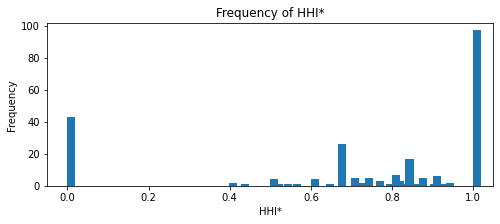

In [109]:
index.drop_duplicates(subset ="Actor",keep = "first", inplace = True)
fig, ax = plt.subplots(figsize=(8, 3))
index["HHI*_2020"].plot(kind = 'hist',align='mid',bins=1000,width=0.02)
plt.xlabel("HHI*")
plt.title(label="Frequency of HHI*",loc="center")

## Career Year vs Total Films (colour = diversity) 

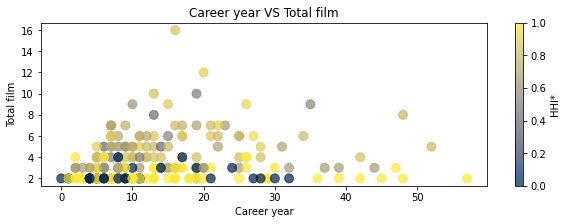

In [110]:
fig, ax = plt.subplots(figsize=(10, 3))
points = ax.scatter(index['Career year'], index['Total film'],c=index['HHI*_2020'], s=80,alpha=0.7, cmap="cividis")
clb=fig.colorbar(points)
clb.ax.set_ylabel('HHI*')
plt.xlabel("Career year")
plt.ylabel("Total film")
plt.title(label="Career year VS Total film",loc="center")
plt.show()

## Find first HHI*

In [111]:
index['combined']=index['HHI*_2015'].astype(str)+','+index['HHI*_2016'].astype(str)+','+index['HHI*_2017'].astype(str)+','+index['HHI*_2018'].astype(str)+','+index['HHI*_2019'].astype(str)+','+index['HHI*_2020'].astype(str)
index['combined'] = [x.lstrip(',nan') for x in index['combined']]
new=index['combined'].str.split(',',n=2,expand=True)
# making separate first name column from new data frame
index["First HHI*"]= new[0]
# Dropping old Name columns
index.drop(columns =["combined"], inplace = True)
index['First HHI*']=pd.to_numeric(index['First HHI*'])
index['First HHI*']=index['First HHI*'].round(decimals = 4)
index

Actor                       Film  Year     Genre  Gender  \
0          A. Galak                    Munafik  2016    Horror    Male   
3        Aaron Aziz  Suamiku, Encik Perfect 10  2015    Comedy    Male   
7        Abam Bocey        Isteri Untuk Dijual  2015  Romantic    Male   
14      Achey Bocey               Hantu Wangan  2018    Comedy    Male   
15      Adam Corrie        Radhi Rudy Bin Dadu  2016    Comedy    Male   
..              ...                        ...   ...       ...     ...   
830  Zamarul Hisham                     Kapsul  2015    Sci-fi    Male   
837     Zizan Razak    Bulan dan Pria Terhebat  2020    Action    Male   
841     Zoey Rahman           Aku Haus Darahmu  2017    Horror    Male   
844     Zul Ariffin         Hantu Kak Limah 3   2018    Comedy    Male   
847      Zulin Aziz                    Bo-Peng  2016    Comedy  Female   

       Races  Debut year  Total film  Career year  HHI*_2020  HHI*_2019  \
0      Malay        1981           3           39   0.666667   0.666667   
3      Malay        2008           4           12   0.833333   0.833333   
7      Malay        2014           5            6   0.400000   0.500000   
14     Malay        2014           3            6   0.000000   0.000000   
15   Chinese        2001           3           19   0.000000   0.000000   
..       ...         ...         ...          ...        ...        ...   
830    Malay        2001           2           19   1.000000   1.000000   
837    Malay        2010           9           10   0.638889   0.607143   
841    Malay        2010           2           10   1.000000   1.000000   
844    Malay        2010           5           10   0.700000   0.700000   
847    Malay        2014           2            6   0.000000   0.000000   

     HHI*_2018  HHI*_2017  HHI*_2016  HHI*_2015  First HHI*  
0     0.666667   0.666667        1.0        NaN      1.0000  
3     0.833333   0.666667        0.0   0.000000      0.0000  
7     0.500000   0.500000        0.5   0.666667      0.6667  
14    0.000000   0.000000        NaN        NaN      0.0000  
15    0.000000   0.000000        0.0   0.000000      0.0000  
..         ...        ...        ...        ...         ...  
830   1.000000   0.000000        0.0   0.000000      0.0000  
837   0.666667   0.400000        0.5   0.500000      0.5000  
841   1.000000   0.000000        NaN        NaN      0.0000  
844   0.666667   0.000000        NaN        NaN      0.0000  
847   0.000000   0.000000        0.0   0.000000      0.0000  

[243 rows x 16 columns]

## First HHI* vs Final HHI*

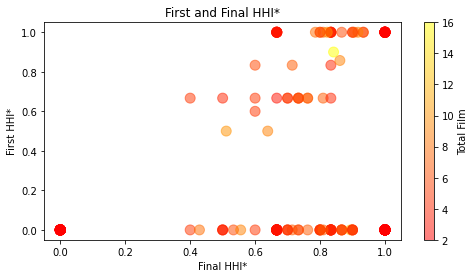

In [112]:
fig = plt.figure(figsize=(8, 4))

plt.scatter(
    x=index['HHI*_2020'],
    y=index['First HHI*'],
    s=100,
    c=index['Total film'],
    cmap="autumn",
    marker='o',
    alpha=0.5,
    )

plt.title("First and Final HHI*")
plt.xlabel("Final HHI*")
plt.ylabel("First HHI*")

clb=plt.colorbar()
clb.ax.set_ylabel('Total Film')
plt.show()

## Actor network 

### Generated nodes and weighted edges from data 

In [113]:
nod= index.loc[:,['Actor','Total film','Career year','Gender','Races','Debut year','HHI*_2020']]
nod.to_csv('Actor_nodes.csv', index=False) #save to new file

In [114]:
edges = pd.read_csv('Filmandactor_1.csv') #read csv file

def get_combinations(group):
    return pd.DataFrame([sorted(e) for e in list(combinations(group['Actor'].values, 2))], columns=['from', 'to'])

edges = edges.groupby('Film').apply(get_combinations) #get all 2-combinations of names within each group
edges = edges.groupby(['from', 'to']).size().to_frame('weight').reset_index() #group by the node names to obtain the weight
edges.to_csv('Actor_edges.csv', index=False) #save into different file
edges.head()

from                       to  weight
0  A. Galak              Achey Bocey       1
1  A. Galak            Along Eyzendy       1
2  A. Galak  Dato' Jalaluddin Hassan       1
3  A. Galak       Dato' Rahim Razali       1
4  A. Galak              Fizz Fairuz       1

### Create network

In [115]:
G=nx.Graph() #create blank network

In [116]:
with open('Actor_edges.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

G.add_weighted_edges_from(edges) #add weighted edges into network

In [117]:
with open('Actor_nodes.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    nodes = [n for n in nodereader][1:]# Retrieve the data 

node_names = [n[0] for n in nodes] # Get a list of only the node names
G.add_nodes_from(node_names) #add nodes into network

In [118]:
#set node attribute
#Create blank dictionary
total_dict = {}
career_dict = {}
gender_dict = {}
races_dict = {}
debut_dict = {}
hhi_dict = {}

#Loop through the list, one row at a time
for node in nodes: 
    total_dict[node[0]] = node[1]
    career_dict[node[0]] = node[2]
    gender_dict[node[0]] = node[3]
    races_dict[node[0]] = node[4]
    debut_dict[node[0]] = node[5]
    hhi_dict[node[0]] = node[6]
    
#set nodes attribute in network
nx.set_node_attributes(G, total_dict, 'Total_Film')
nx.set_node_attributes(G, career_dict, 'Career')
nx.set_node_attributes(G, gender_dict, 'Gender')
nx.set_node_attributes(G, races_dict, 'Races')
nx.set_node_attributes(G, debut_dict, 'Debut_Year')
nx.set_node_attributes(G, hhi_dict, 'HHI*')

### Network Information 

In [119]:
density = nx.density(G) #calculate network density
print("Network density:", density)
print(nx.info(G))

Network density: 0.061966466006870044
Name: 
Type: Graph
Number of nodes: 243
Number of edges: 1822
Average degree:  14.9959


In [120]:
# If the Graph has more than one component, this will return False:
print("Network is connected:",nx.is_connected(G))
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)
print("Triadic closure:", nx.transitivity(G))#transitivity
print ("Average shortest path:", nx.average_shortest_path_length(subgraph))
print ("Average clustering:", nx.average_clustering(G))

Network is connected: True
Network diameter of largest component: 6
Triadic closure: 0.2997312992979111
Average shortest path: 2.47984899500051
Average clustering: 0.44530009899131506


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of nodes')

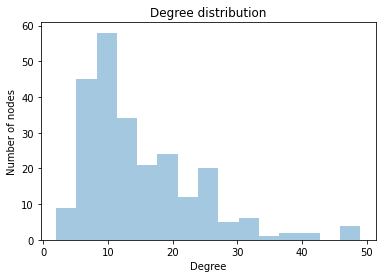

In [121]:
# Degree Distribution
degrees = pd.DataFrame(G.degree(), columns=['Node','Degree'])
sns.distplot(a=degrees['Degree'],kde=False)
plt.title('Degree distribution')
plt.ylabel('Number of nodes')

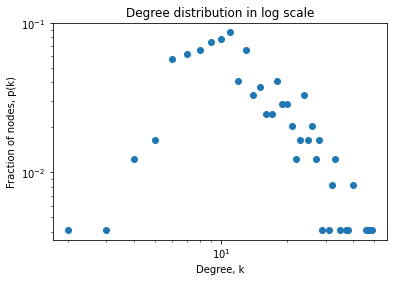

In [122]:
#Degree distribution in log scale
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
plt.figure()
plt.plot(degree_values, histogram, 'o')
plt.title('Degree distribution in log scale')
plt.xlabel('Degree, k')
plt.ylabel('Fraction of nodes, p(k)')
plt.xscale('log')
plt.yscale('log')
plt.show()

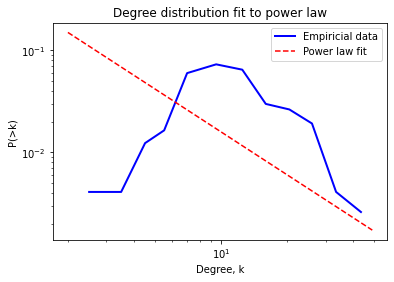

In [123]:
#Fit power law
import powerlaw
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # used for degree distribution and powerlaw test
#Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence,xmin=1) 
fig2 = fit.plot_pdf(color='blue', linewidth=2, label='Empiricial data')
fit.power_law.plot_pdf(ax=fig2,color='red', linestyle='--', label='Power law fit') #powerlaw
plt.ylabel('P(>k)')
plt.xlabel('Degree, k')
plt.title('Degree distribution fit to power law')
plt.legend()

### Draw network with networkx

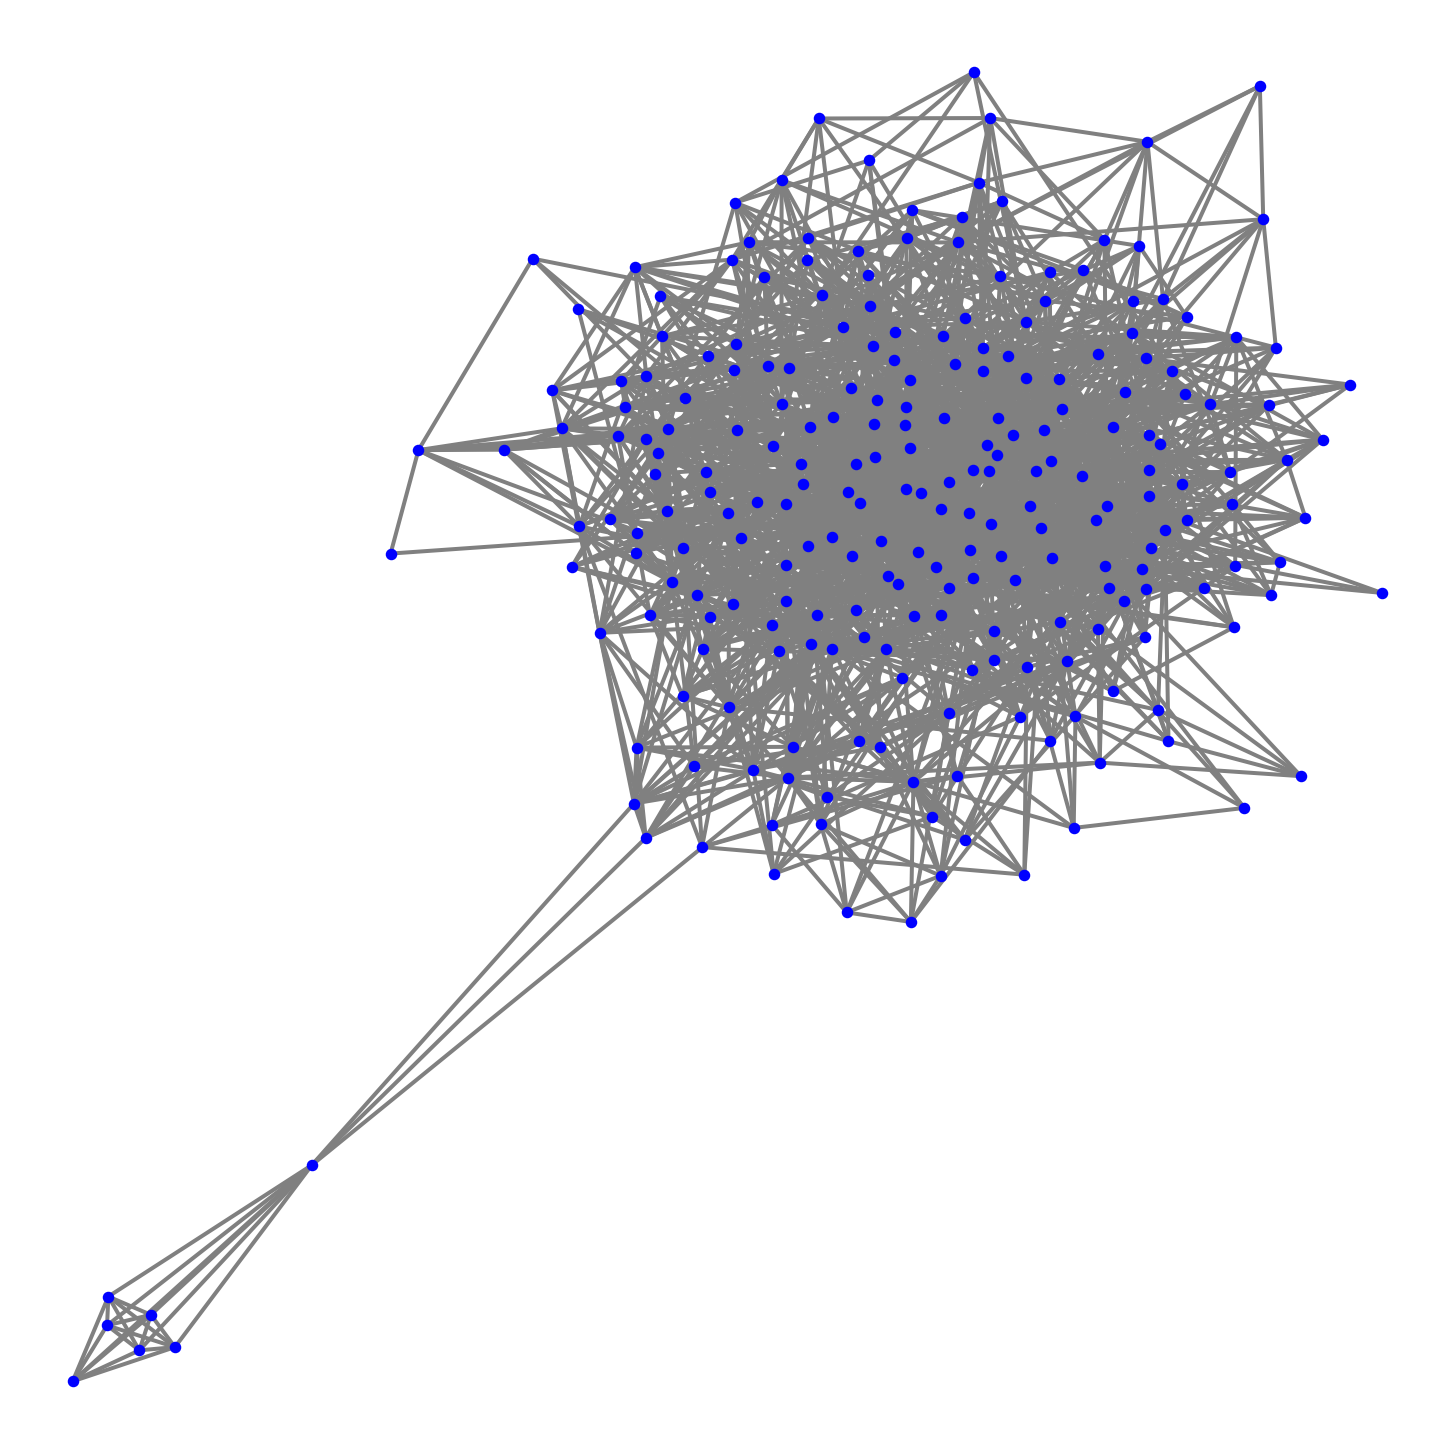

In [124]:
pos=nx.spring_layout(G,scale=2) #spring layout
plt.figure(figsize =(20, 20)) #figure size
nx.draw(G,pos,
            with_labels=False,
            node_size=100, 
            node_color="blue", 
            node_shape="o",
            font_size=8,
            font_color="black",
            linewidths=1.5,
            width=4,
            edge_color="grey",)

## Calculate centralities and plot against total films 

In [125]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
closeness_dict = nx.closeness_centrality(G) # Run closeness centrality
degree_dict = nx.degree_centrality(G) # Run degree centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
nx.set_node_attributes(G, closeness_dict, 'closeness')
nx.set_node_attributes(G, degree_dict, 'degree')

In [126]:
att = pd.DataFrame([i[1] for i in G.nodes(data=True)], index=[i[0] for i in G.nodes(data=True)])
#att = att.astype({'Total_Film':'float64', 'Year_Career':'float64', 'Debut_Year':'float64', 'HHI*':'float64'})
att.to_csv('Actor_centralities.csv', index=True) #save to new file
att = pd.read_csv('Actor_centralities.csv')
att = att.rename(columns={att.columns[0]: 'Actor'})
att.head()

Actor  Total_Film  Career Gender  Races  Debut_Year  \
0                 A. Galak           3      39   Male  Malay        1981   
1              Achey Bocey           3       6   Male  Malay        2014   
2            Along Eyzendy           6      17   Male  Malay        2003   
3  Dato' Jalaluddin Hassan           9      26   Male  Malay        1994   
4       Dato' Rahim Razali           4      42   Male  Malay        1978   

       HHI*  betweenness  eigenvector  closeness    degree  
0  0.666667     0.001703     0.042753   0.416523  0.045455  
1  0.000000     0.002892     0.044936   0.415094  0.057851  
2  0.600000     0.015891     0.089937   0.460952  0.107438  
3  0.916667     0.040544     0.136918   0.501035  0.165289  
4  0.833333     0.007555     0.066992   0.444853  0.082645

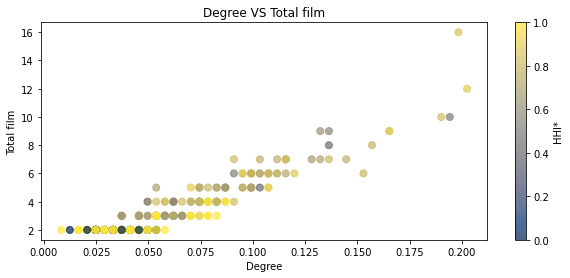

In [127]:
fig, ax = plt.subplots(figsize=(10, 4))
points = ax.scatter(att['degree'], att['Total_Film'],c=att['HHI*'], s=50,alpha=0.7, cmap="cividis")
clb=fig.colorbar(points)
clb.ax.set_ylabel('HHI*')
plt.xlabel("Degree")
plt.ylabel("Total film")
plt.title(label="Degree VS Total film",loc="center")
plt.show()

In [159]:
#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results= ssreg / sstot

    return results

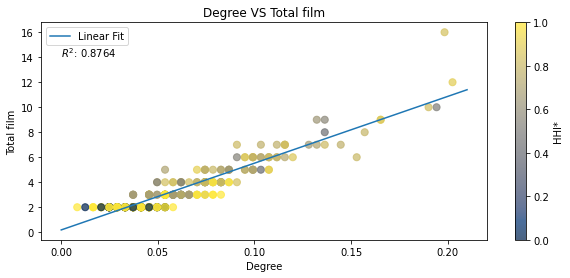

In [158]:
# Add scatterplot
fig, ax = plt.subplots(figsize=(10, 4))
points = ax.scatter(att['degree'], att['Total_Film'],c=att['HHI*'], s=50,alpha=0.7, cmap="cividis")
clb=fig.colorbar(points)
clb.ax.set_ylabel('HHI*')
plt.xlabel("Degree")
plt.ylabel("Total film")
plt.title(label="Degree VS Total film",loc="center")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(att['degree'], att['Total_Film'], deg=1)

# Create sequence of 100 numbers from 0 to 0.21 
xseq = np.linspace(0, 0.21, num=100)

r='%.4f' %polyfit(att['degree'], att['Total_Film'], 1)
# Plot regression line
ax.plot(xseq, a + b * xseq,  lw=1.5, label="Linear Fit")
plt.legend()
ax.text(0, 14, '$R^2$: '+r, fontsize = 10)
plt.show()

In [160]:
#find r-squared of polynomial model with degree = 1
polyfit(att['degree'], att['Total_Film'], 1)

0.876404142294777

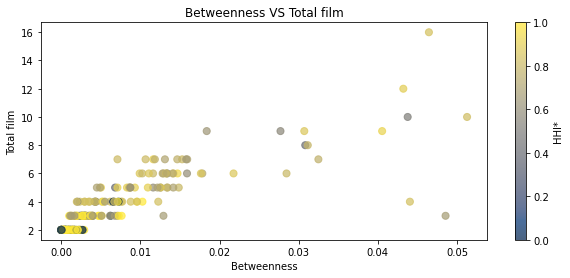

In [146]:
fig, ax = plt.subplots(figsize=(10, 4))
points = ax.scatter(att['betweenness'], att['Total_Film'],c=att['HHI*'], s=50,alpha=0.7, cmap="cividis")
clb=fig.colorbar(points)
clb.ax.set_ylabel('HHI*')
plt.xlabel("Betweenness")
plt.ylabel("Total film")
plt.title(label="Betweenness VS Total film",loc="center")
plt.show()

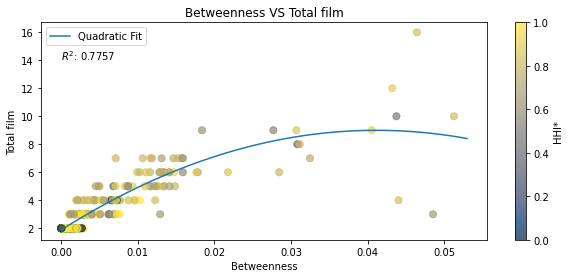

In [163]:
fig, ax = plt.subplots(figsize=(10, 4))
#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(att['betweenness'], att['Total_Film'], 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(0, 0.053, 50)
points = ax.scatter(att['betweenness'], att['Total_Film'],c=att['HHI*'], s=50,alpha=0.7, cmap="cividis")
clb=fig.colorbar(points)
clb.ax.set_ylabel('HHI*')
ax.plot(polyline, model(polyline),label="Quadratic Fit")
r='%.4f' %polyfit(att['betweenness'], att['Total_Film'], 2)
ax.text(0, 14, '$R^2$: '+r, fontsize = 10)
plt.legend()
plt.xlabel("Betweenness")
plt.ylabel("Total film")
plt.title(label="Betweenness VS Total film",loc="center")
plt.show()

In [164]:
#find r-squared of polynomial model with degree = 2
polyfit(att['betweenness'], att['Total_Film'], 2)

0.7757234031178208

In [165]:
#Trying log fit for betweenness centrality
df = att[att['betweenness'] > 0]
x = np.array(df['betweenness'])
y = np.array(df['Total_Film'])
log_x = np.log(x)

coefficients = np.polyfit(log_x, y, 1)
print(coefficients)


[ 1.2130577  10.68302026]


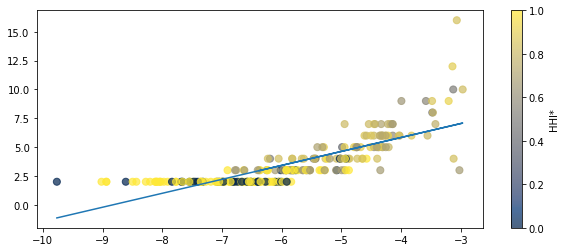

In [166]:
fig, ax = plt.subplots(figsize=(10, 4))
c = 1.21 * log_x + 10.68
points = ax.scatter(log_x, y,c=df['HHI*'], s=50,alpha=0.7, cmap="cividis")
clb=fig.colorbar(points)
clb.ax.set_ylabel('HHI*')
#ax.plot(log_x, y, "o")
ax.plot(log_x, c)

In [167]:
#R^2 for log fit of betweenness
polyfit(log_x, y, 1)

0.6288554098274652

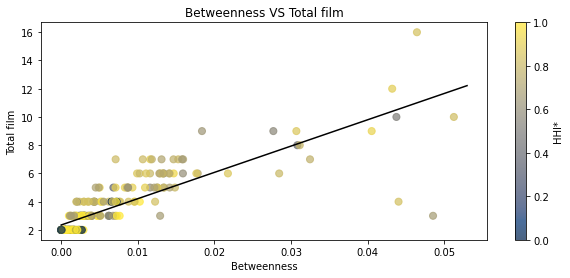

In [168]:
#Trying linear fit for betweenness
fig, ax = plt.subplots(figsize=(10, 4))
points = ax.scatter(att['betweenness'], att['Total_Film'],c=att['HHI*'], s=50,alpha=0.7, cmap="cividis")
clb=fig.colorbar(points)
clb.ax.set_ylabel('HHI*')
plt.xlabel("Betweenness")
plt.ylabel("Total film")
plt.title(label="Betweenness VS Total film",loc="center")

b, a = np.polyfit(att['betweenness'], att['Total_Film'], deg=1)

# Create sequence of 100 numbers from 0 to 0.21 
xseq = np.linspace(0, 0.053, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=1.5)

In [169]:
#R^2 for log fit of betweenness
polyfit(att['betweenness'], att['Total_Film'], 1)

0.6942948341282904

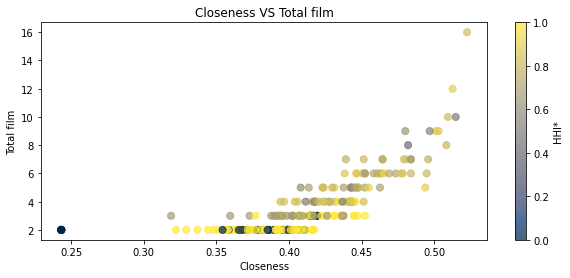

In [173]:
fig, ax = plt.subplots(figsize=(10, 4))
points = ax.scatter(att['closeness'], att['Total_Film'],c=att['HHI*'], s=50,alpha=0.7, cmap="cividis")
clb=fig.colorbar(points)
clb.ax.set_ylabel('HHI*')
plt.xlabel("Closeness")
plt.ylabel("Total film")
plt.title(label="Closeness VS Total film",loc="center")
plt.show()

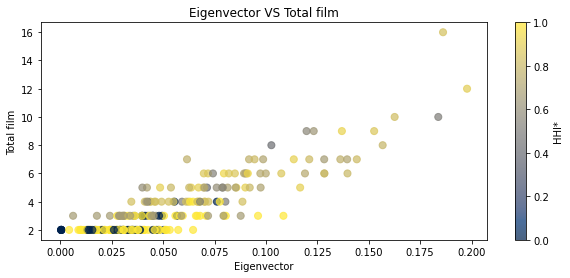

In [174]:
fig, ax = plt.subplots(figsize=(10, 4))
points = ax.scatter(att['eigenvector'], att['Total_Film'],c=att['HHI*'], s=50,alpha=0.7, cmap="cividis")
clb=fig.colorbar(points)
clb.ax.set_ylabel('HHI*')
plt.xlabel("Eigenvector")
plt.ylabel("Total film")
plt.title(label="Eigenvector VS Total film",loc="center")
plt.show()

### Save network to Gephi

In [172]:
nx.write_gexf(G, 'actor_network.gexf')